# **Processamento Dados ERA5**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
era5 = xr.open_dataset("download_1.nc")

In [3]:
era5

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 13, expver: 2, time: 3638)
Coordinates:
  * longitude  (longitude) float32 -41.0 -40.75 -40.5 ... -29.5 -29.25 -29.0
  * latitude   (latitude) float32 -20.0 -20.25 -20.5 ... -22.5 -22.75 -23.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2004-04-01T12:00:00 ... 2021-12-31T12:00:00
Data variables:
    sst        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-18 20:25:40 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [23]:
# Fast Plot 
sst = era5.sst
era5_sample = sst.isel(time=500, expver=0)

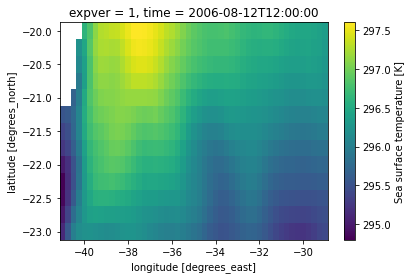

In [24]:
era5_sample.plot()

# Visualizando uma amostra ...

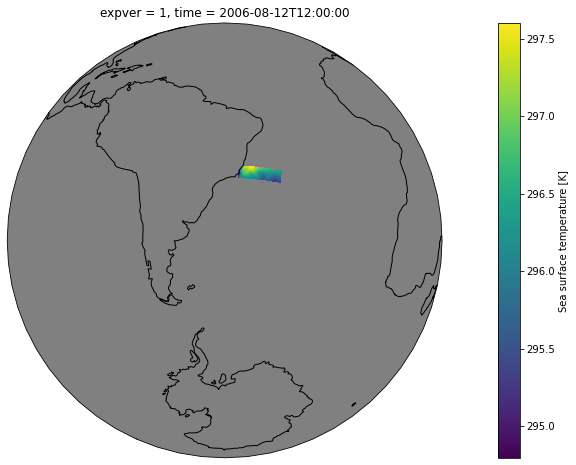

In [58]:
import cartopy.crs as ccrs
plt.figure(figsize=(20,8))
t = era5_sample.plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-45,-40), facecolor = "gray"),
    transform = ccrs.PlateCarree(),
)

t.axes.set_global()

t.axes.coastlines()



In [42]:
# Outra visualização....

lon, lat = np.meshgrid(np.linspace(-41,-29,49), np.linspace(-20,-23,13))

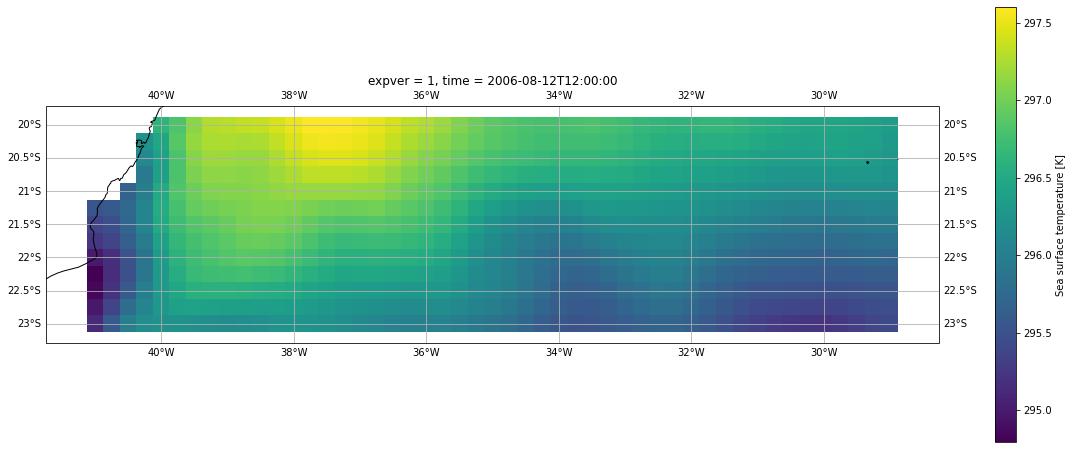

In [55]:
plt.figure(figsize=(20,8))
ax = plt.subplot(projection=ccrs.PlateCarree())

era5_sample.plot.pcolormesh("longitude","latitude", ax=ax)
#ax.scatter(lon, lat, transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

In [41]:
era5_sample

<xarray.DataArray 'sst' (latitude: 13, longitude: 49)>
array([[      nan,       nan,       nan, ..., 296.4334 , 296.4031 , 296.3474 ],
       [      nan,       nan,       nan, ..., 296.40408, 296.37872, 296.31332],
       [      nan,       nan,       nan, ..., 296.35913, 296.33966, 296.27707],
       ...,
       [294.8494 , 295.20575, 295.58087, ..., 295.50177, 295.5291 , 295.5359 ],
       [294.9705 , 295.36307, 295.78595, ..., 295.4158 , 295.4509 , 295.47247],
       [295.11597, 295.56226, 295.99094, ..., 295.30936, 295.3797 , 295.41284]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -41.0 -40.75 -40.5 ... -29.5 -29.25 -29.0
  * latitude   (latitude) float32 -20.0 -20.25 -20.5 ... -22.5 -22.75 -23.0
    expver     int32 1
    time       datetime64[ns] 2006-08-12T12:00:00
Attributes:
    units:      K
    long_name:  Sea surface temperature

array([[-20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  ,
        -20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  ,
        -20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  ,
        -20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  ,
        -20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  ,
        -20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  , -20.  ,
        -20.  ],
       [-20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25,
        -20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25,
        -20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25,
        -20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25,
        -20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25,
        -20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25, -20.25,
        -20.25],
       [-20.5 , -20.5 , -20.5 , -20.5 , -20.5 , -20.5 , -20.5 , -20.5 ,
        -20.5 , -20.5 , -20.5 